In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
import glob as gb

In [2]:
#Plot size parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 4.5
plt.rcParams["figure.figsize"] = fig_size

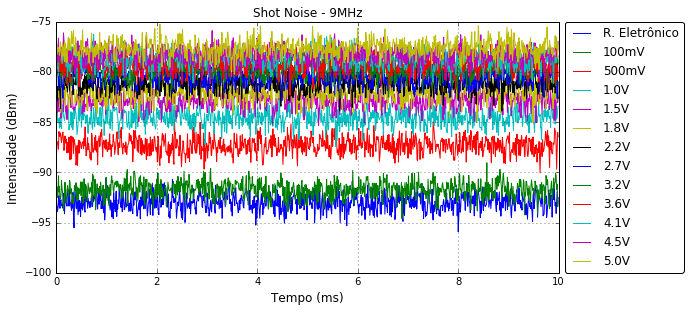

In [3]:
#Frequencies available {1, 3, 5, 7, 9, 12}

#Defining frequency
freq = 9

#Gathering all the CSV files which filename starts with 'freq' 
#in alphabetical ordered list
#e.g. (for freq = 5): '5MHZA.CSV'


files = sorted([file for file in gb.glob("{}*".format(freq))])
#OBS: "{}*".format(5) == "5*"
#OBS: e.g. (filenames which starts with "5"): gb.glob("5*") 
#Creating an iterable for applying "next"
traces = iter(files)

#Data from CSV

#Column names for every CSV
cols1 = ['t','RE', 'sn100mV', 'sn500mV']
cols2 = ['t','sn1000mV', 'sn1500mV', 'sn1800mV']
cols3 = ['t','sn2200mV', 'sn2700mV', 'sn3200mV']
cols4 = ['t','sn3600mV', 'sn4100mV', 'sn4500mV']
cols5 = ['t','sn5000mV']

#Passing CSVs to variables
data1 = pd.read_csv(next(traces), sep=',', skiprows=range(0, 16), 
                    header=None, names=cols1)
data2 = pd.read_csv(next(traces), sep=',', skiprows=range(0, 16), 
                    header=None, names=cols2)
data3 = pd.read_csv(next(traces), sep=',', skiprows=range(0, 16), 
                    header=None, names=cols3)
data4 = pd.read_csv(next(traces), sep=',', skiprows=range(0, 16), 
                    header=None, names=cols4)
data5 = pd.read_csv(next(traces), sep=',', skiprows=range(0, 16), 
                    header=None, names=cols5)

#Datasets of traces
x = (data1.t)*1e+3
yRE = data1.RE
y100 = data1.sn100mV; y500 = data1.sn500mV; y1000 = data2.sn1000mV
y1500 = data2.sn1500mV; y1800 = data2.sn1800mV; y2200 = data3.sn2200mV
y2700 = data3.sn2700mV; y3200 = data3.sn3200mV; y3600 = data4.sn3600mV
y4100 = data4.sn4100mV; y4500 = data4.sn4500mV; y5000 = data5.sn5000mV

noiseData = [yRE, y100, y500, y1000, y1500, y1800, y2200, y2700, y3200, y3600, 
          y4100, y4500, y5000]
noiseLabels = ["R. Eletrônico", "100mV", "500mV", "1.0V", "1.5V", "1.8V", 
               "2.2V", "2.7V", "3.2V", "3.6V", "4.1V", "4.5V", "5.0V"]

#Smoothing by Savitzky-Golay filter
#y1_= savgol_filter(y11, 3, 1)

#Plotting all the datasets - Intensity(dBm) vs. Time(ms)

ax = plt.subplot(111)
ax.set_title('Shot Noise - ' + "{}".format(freq) + 'MHz')
ax.set_xlabel('Tempo (ms)', size=12)
ax.set_ylabel('Intensidade (dBm)', size=12)
ax.grid(True)


#Defining plot axis limits
#ax.set_xlim([0,100])

for index, item in enumerate(noiseData):    
    ax.plot(x, item, label=noiseLabels[index])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), 
          fancybox=True, ncol=1)

plt.savefig('sn'+ "{}".format(freq)+'mhzRaw.png', bbox_inches='tight', dpi=300);
#e.g. sn9mhzRaw.png

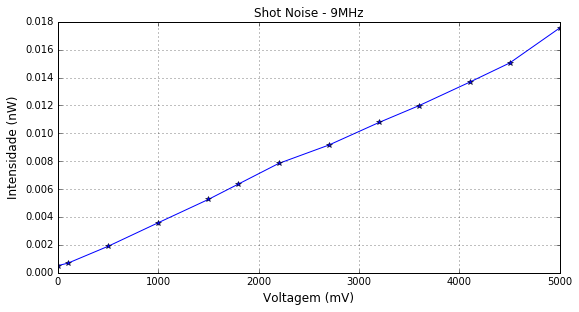

In [4]:
#Plotting Intensity(nW) vs. Voltage(mV)

voltages = [0, 100, 500, 1000, 1500, 1800, 2200, 2700, 3200, 3600, 4100, 
            4500, 5000]
#noises in nW
noisesnw = [10**(i/10 + 6) for i in noiseData] 
#Averaging noises
avgNoises = [item.mean() for item in noisesnw]

ax2 = plt.subplot(111)
ax2.set_title('Shot Noise - ' + "{}".format(freq) + 'MHz')
ax2.set_xlabel('Voltagem (mV)', size=12)
ax2.set_ylabel('Intensidade (nW)', size=12)
ax2.grid(True)

ax2.plot(voltages, avgNoises, "*-")
plt.savefig('sn'+ "{}".format(freq)+'mhz.png', bbox_inches='tight', dpi=300)
#e.g. sn9mhz.png